In [1]:
import full_nuclide_ap21
import full_nuclide_ap21_r
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pynucastro as pyna

In [2]:
def plot(tmin, tmax, sol, network, outfile='test'):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(network.nnuc):
        ax.loglog(sol.t, sol.y[i,:] * network.A[i], label=f"X({network.names[i].capitalize()})")

    ax.set_xlim(tmin, tmax)
    ax.set_ylim(1.e-10, 1.0)
    ax.legend(fontsize="small")

    fig.set_size_inches((10, 8))
    fig.savefig(outfile)

def composition(network):

    # X0 = np.zeros(network.nnuc)
    # X0[network.jco55] = 1.0
    # X0[network.jn] = 1.0
    # X0[network.jcr48] = 1.0
    # X0[network.jfe52] = 1.0
    # X0[network.jhe4] = 1.0
    # X0[network.jmn51] = 1.0
    # X0[network.jni56] = 1.0
    # X0[network.jcr56] = 1.0
    # X0[network.jfe54] = 1.0
    # X0[network.jfe55] = 1.0
    # X0[network.jfe56] = 1.0
    # X0[network.jmn56] = 1.0
    # X0[network.jp] = 1.0
    
    X0 = np.zeros(network.nnuc)
    X0[network.jco55] = 0.0
    X0[network.jn] = 1.0
    X0[network.jcr48] = 1.0
    X0[network.jfe52] = 0.0
    X0[network.jhe4] = 1.0
    X0[network.jmn51] = 0.0
    X0[network.jni56] = 0.0
    X0[network.jcr56] = 0.0
    X0[network.jfe54] = 0.0
    X0[network.jfe55] = 0.0
    X0[network.jfe56] = 0.0
    X0[network.jmn56] = 0.0
    X0[network.jp] = 1.0
    
    X0 /= sum(X0)
    #X0 /= network.nnuc
    Y0 = X0/network.A

    return Y0

    

In [3]:
rho = 1.0e4
T = 7.0e9

Y0 = composition(full_nuclide_ap21)
Y0_r = composition(full_nuclide_ap21_r)

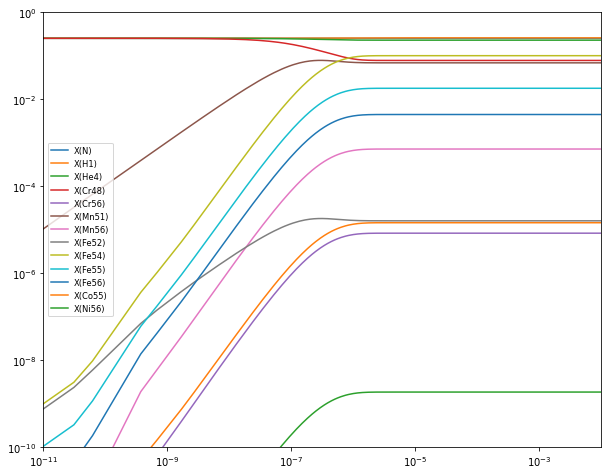

In [4]:
tmax = 1.0e-2
tmin = 1.0e-11

# tmax = 1.0e-2
# tmin = 1.0e-11

sol =  solve_ivp(full_nuclide_ap21.rhs, [0, tmax], Y0, method="BDF",
                dense_output=True, args=(rho, T), rtol=1.e-8, atol=1.e-8, jac=full_nuclide_ap21.jacobian)

# sol =  solve_ivp(full_nuclide_ap21.rhs, [0, tmax], Y0, method="BDF",
#                 dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-6)
                
plot(tmin=tmin, tmax=tmax, sol=sol, network=full_nuclide_ap21, outfile='rho_{:.2e}_T_{:.2e}.png'.format(rho,T))

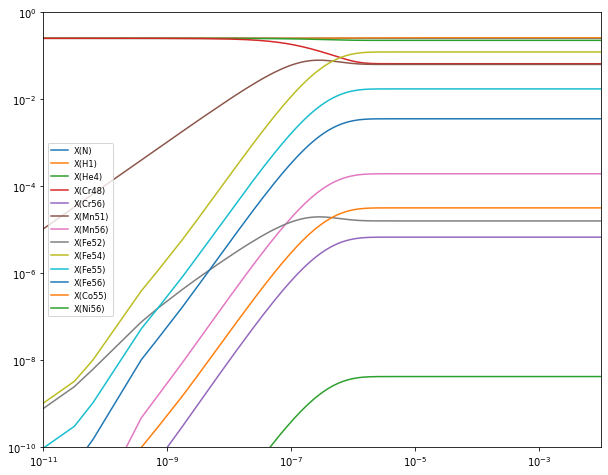

In [5]:
tmax = 1.0e-2
tmin = 1.0e-11

sol_r = solve_ivp(full_nuclide_ap21_r.rhs, [0, tmax], Y0_r, method="BDF",
                dense_output=True, args=(rho, T), rtol=1.e-8, atol=1.e-8, jac=full_nuclide_ap21_r.jacobian)

# sol_r = solve_ivp(full_nuclide_ap21_r.rhs, [0, tmax], Y0_r, method="BDF",
#                 dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-6)

plot(tmin=tmin, tmax=tmax, sol=sol_r, network=full_nuclide_ap21_r, outfile='rho_{:.2e}_T_{:.2e}_r.png'.format(rho,T))

In [6]:
# Find NSE composition to compare with integration route:

library = pyna.ReacLibLibrary()
sub = library.linking_nuclei(['cr48', 'mn51', 'fe52', 'ni56', 'p', 'n', 'he4', 'co55',
              'fe54','fe55', 'fe54', 'fe56', 'cr56', 'mn56'])

rc = pyna.RateCollection(libraries=sub)

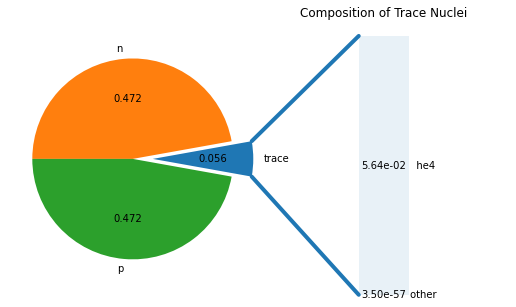

From NSE calculation:
  X(n) : 0.47178705676692634
  X(p) : 0.4717870567669292
  X(he4) : 0.05642588646614556
  X(cr48) : 3.4240289958958137e-57
  X(cr56) : 2.4343426087291937e-62
  X(mn51) : 3.4621309372412384e-59
  X(mn56) : 2.9823953685150028e-61
  X(fe52) : 1.744396445316098e-61
  X(fe54) : 2.0889772350555056e-59
  X(fe55) : 3.43986322895874e-60
  X(fe56) : 1.2720050795470844e-59
  X(co55) : 1.36538108882352e-63
  X(ni56) : 5.071144251496364e-66

From integration:
X(n): 0.24948092900993438
X(h1): 0.255868070208092
X(he4): 0.0566443545900885
X(cr48): 0.00161192238459412
X(cr56): 1.4742341412676256e-07
X(mn51): 0.0013368708294228563
X(mn56): 1.2696754055956053e-05
X(fe52): 3.0565815086335227e-07
X(fe54): 0.0018447278991951812
X(fe55): 0.00032241151322580245
X(fe56): 7.898976203060248e-05
X(co55): 2.6107908635415144e-07
X(ni56): 3.2749070122111823e-11


In [14]:
ye = full_nuclide_ap21.ye(Y0)
comp = rc.get_comp_NSE(rho, T, ye)
comp.plot()
print("From NSE calculation:")
print(comp)

print("From integration:")
for i, nuc in enumerate(full_nuclide_ap21.names):
    print(f"X({nuc}): {sol.y[:,-1][i]}")

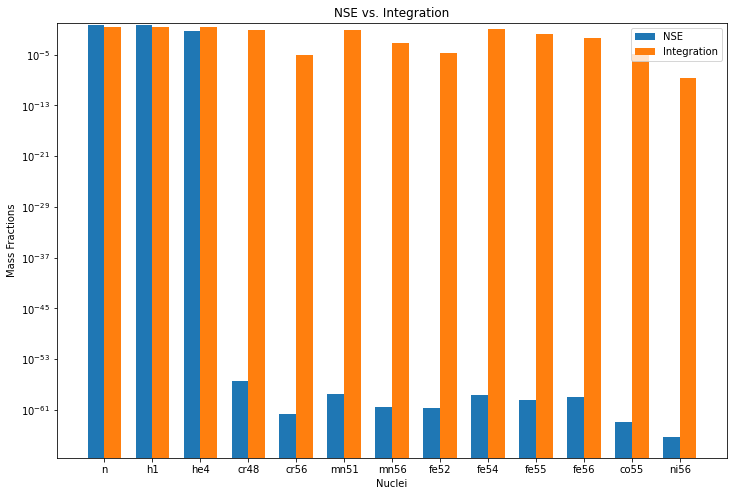

In [8]:
# Bar graph for visual

x = np.arange(len(full_nuclide_ap21.names))
width = 0.35

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.bar(x - width/2.0, list(comp.X.values()), width, label = 'NSE')
ax.bar(x + width/2.0, sol.y[:,-1]*full_nuclide_ap21.A, width, label = 'Integration')
ax.set_xlabel("Nuclei")
ax.set_xticks(x, full_nuclide_ap21.names)
ax.set_ylabel("Mass Fractions")
ax.set_yscale("log")
ax.set_title("NSE vs. Integration")
ax.set_ylim(ymax = 1)
ax.legend()